# 1.Data preprocessing
### Feature 1: Standard Scaling
Feature 1 primarily contains values that are clustered close to zero, with a few outliers that deviate significantly from the mean. To handle this, standard scaling is an appropriate choice. Standard scaling, also known as Z-score normalization, transforms the data such that it has a mean of 0 and a standard deviation of 1. This is achieved by subtracting the mean of the feature from each data point and then dividing by the standard deviation. The key advantage of using standard scaling for Feature 1 is that it normalizes the small variances around the mean without distorting the relative distances between the data points. This ensures that all data points are treated uniformly by machine learning algorithms, particularly those sensitive to the variance of features, such as gradient-based optimization methods, while still preserving the impact of outliers.
### Feature 2: Min-Max Scaling
Feature 2 displays a wide range of values, extending from approximately -40 to +30, which indicates significant variability within this feature. To manage this, min-max scaling is recommended. Min-max scaling compresses the feature’s values into a specified range, typically [0, 1] or [-1, 1]. This transformation is done by subtracting the minimum value of the feature from each data point and then dividing by the range of the feature (the difference between the maximum and minimum values). The primary benefit of min-max scaling for Feature 2 is that it ensures all values are brought within a smaller, more manageable range. This uniformity across features is crucial for algorithms that rely on distance metrics or require inputs to be within a specific range, such as K-Nearest Neighbors or neural networks. By applying min-max scaling, Feature 2 is aligned with other features in the dataset, allowing for more balanced and effective processing by machine learning models.



# 2. Learning from Data

## 2.1 Training and Testing Data Splitting

In [2]:
import numpy as np
import matplotlib . pyplot as plt
from sklearn . model_selection import train_test_split
from sklearn . linear_model import LinearRegression
# Generate 100 samples
n_samples = 100
# Generate X values ( uniformly distributed between 0 and 10)
X = 10 * np . random . rand ( n_samples , 1)
# Generate epsilon values ( normally distributed with mean 0 and standard deviation 15)
epsilon = np . random . normal (0 , 15 , n_samples )
# Generate Y values using the model Y = 3 + 3X + epsilon
Y = 3 + 2 * X + epsilon [: , np . newaxis ]

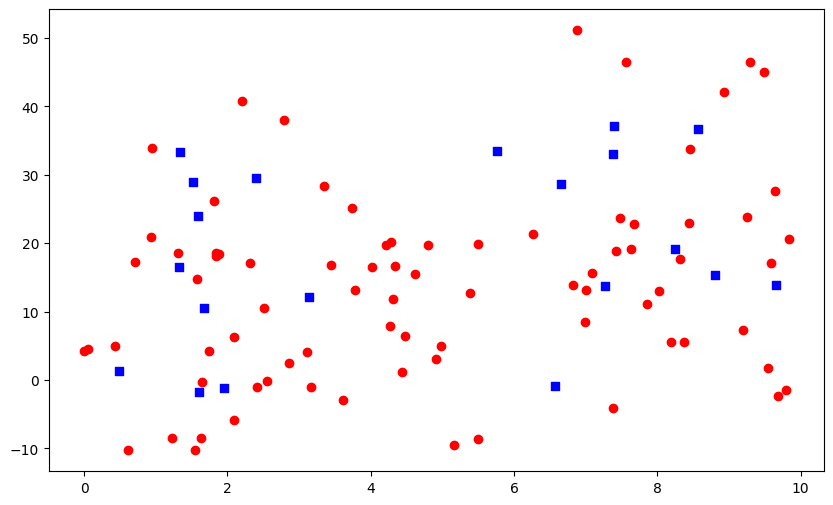

In [3]:
r = np . random . randint (104)
# Split the data into training and test sets (80% train , 20% test )
X_train , X_test , Y_train , Y_test = train_test_split (X , Y , test_size =0.2 , random_state = r )
# Plot the data points
plt . figure ( figsize =(10 , 6) )
plt . scatter ( X_train , Y_train , alpha =1 , marker ='o', color ='red', label ='Training Data ')
plt . scatter ( X_test , Y_test , alpha =1 , marker ='s', color ='blue', label ='Testing Data ')
plt . show ()

when running the code multiple times each time the training set and the testing data set differ from the previous state.In this code the training data and testing data are splits with a random variable(r) generated in each run this r gets random values so the training set and testing set differ according to that.

## 2.2 Linear Regression Model Variability

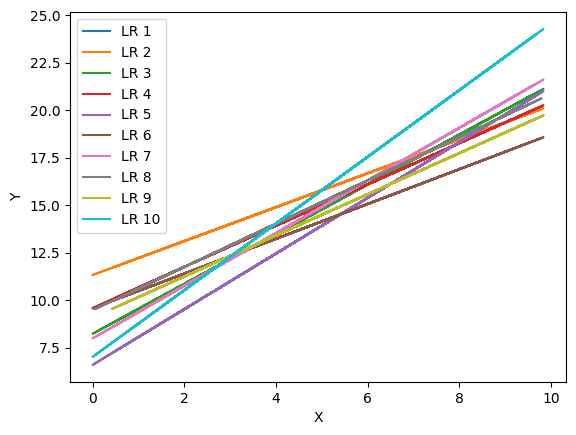

In [4]:
for i in range(10):  # Plotting 10 different instances
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=np.random.randint(104))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred_train = model.predict(X_train)
    plt.plot(X_train, Y_pred_train, label=f'LR {i+1}')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


The differences between linear regression models across different instances occur primarily due to the variability introduced by randomly splitting the dataset into training and testing sets. Each time the data is split with a different random seed, the model is trained on a slightly different subset of the data, leading to variations in the learned relationships between the input and output variables. This results in different regression lines because the model may overfit to specific training sets or capture noise differently depending on the subset it receives, highlighting the sensitivity of linear regression to the specific data it is trained on.

## 2.3 Increasing the Number of Data Samples to 10,000

In [5]:
import numpy as np
import matplotlib . pyplot as plt
from sklearn . model_selection import train_test_split
from sklearn . linear_model import LinearRegression
# Generate 100 samples
n_samples = 10000
# Generate X values ( uniformly distributed between 0 and 10)
X = 10 * np . random . rand ( n_samples , 1)
# Generate epsilon values ( normally distributed with mean 0 and standard deviation 15)
epsilon = np . random . normal (0 , 15 , n_samples )
# Generate Y values using the model Y = 3 + 3X + epsilon
Y = 3 + 2 * X + epsilon [: , np . newaxis ]

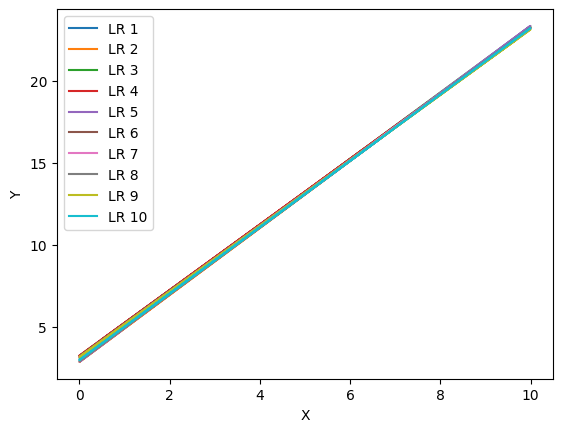

In [6]:
for i in range(10):  # Plotting 10 different instances
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=np.random.randint(104))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred_train = model.predict(X_train)
    plt.plot(X_train, Y_pred_train, label=f'LR {i+1}')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

The linear regression models across different instances become more consistent, with less variation between the regression lines. This is because a larger dataset provides a more stable and representative sample of the underlying data distribution, reducing the impact of randomness in the training data. In contrast, with only 100 data samples, each random split can result in a significantly different subset, leading to greater variability in the models. The increased stability with 10,000 samples arises because larger datasets tend to smooth out anomalies and noise, allowing the model to better capture the true relationship between variables.

# 3 Linear regression on real world data

## 3.1 Loading the data

In [7]:
!pip install ucimlrepo


Defaulting to user installation because normal site-packages is not writeable


In [8]:
 # If package not installed, install it using pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
# fetch dataset
infrared_thermography_temperature = fetch_ucirepo(id=925)
# data (as pandas dataframes)
X = infrared_thermography_temperature.data.features
y = infrared_thermography_temperature.data.targets
# metadata
print(infrared_thermography_temperature.metadata)
# variable information
print(infrared_thermography_temperature.variables)


{'uci_id': 925, 'name': 'Infrared Thermography Temperature', 'repository_url': 'https://archive.ics.uci.edu/dataset/925/infrared+thermography+temperature+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/925/data.csv', 'abstract': 'The Infrared Thermography Temperature Dataset contains temperatures read from various locations of inferred images about patients, with the addition of oral temperatures measured for each individual. The 33 features consist of gender, age, ethnicity, ambiant temperature, humidity, distance, and other temperature readings from the thermal images. The dataset is intended to be used in a regression task to predict the oral temperature using the environment information as well as the thermal image readings. ', 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Tabular'], 'num_instances': 1020, 'num_features': 33, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Gender', 'Age', 'Ethnicity'], 'target_col': ['aveO

## 3.2 Determine independent and dependent variables

independent variables

In [104]:
print(X.shape[1])

33


Dependent variables

In [105]:
print(y.shape[1])

2


## 3.3 Feasibility of Applying Linear Regression

In [9]:
import pandas as pd
#creating a dataframe including features and tragets(targets are the last 2 columns)
df = pd.concat([X, y],axis=1)
df


,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralF,aveOralM
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,36.85,36.59
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.00,37.19
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.20,37.34
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,36.85,37.09
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,36.80,37.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,Female,21-25,Asian,25.7,50.8,0.6,1.2225,35.6425,35.6525,34.8575,...,35.4000,35.1375,35.2750,35.8525,35.7475,36.0675,35.6775,35.7100,36.95,36.99
1016,Female,21-25,White,25.7,50.8,0.6,1.4675,35.9825,35.7575,35.4275,...,35.2200,35.2075,35.0700,35.7650,35.5525,36.5000,36.4525,36.4900,37.25,37.19
1017,Female,18-20,Black or African-American,28.0,24.3,0.6,0.1300,36.4075,36.3400,35.8700,...,35.2275,35.3675,35.3425,36.3750,35.7100,36.5350,35.9650,35.9975,37.35,37.59
1018,Male,26-30,Hispanic/Latino,25.0,39.8,0.6,1.2450,35.8150,35.5250,34.2950,...,34.9250,34.7150,34.5950,35.4150,35.3100,35.8600,35.4150,35.4350,37.15,37.29


In [119]:
missing_counts = df.isnull().sum()
print(missing_counts)


Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       2
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
aveOralF       0
aveOralM       0
dtype: int64


## 3.4 Is NaN can be used

In [120]:
#We could calculate the ratio of Nan values without calculating the number of values
nan_ratio_distance = df['Distance'].isna().sum() / df.shape[0]
print(f"NaN ratio for distance: {nan_ratio_distance}")

NaN ratio for distance: 0.00196078431372549


Given that there are only 2 missing values for the 'Distance' feature, the ratio of missing data is quite small, even less than 0.1. In this case, it's reasonable to remove those 2 values. However, if the ratio of missing values were larger and closer to 1, other approaches might be necessary to avoid reducing the size of the dataset. These approaches include:

Replacing the missing values with the mean of the available data

Filling them in with zeros

Using interpolation to estimate the missing values

These methods allow us to retain the full dataset while addressing the issue of missing data.

## 3.5  Selecting "aveOralM" as the dependent feature. And for the independent features, selecting ’Age’ and four other features.

In [121]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [112]:
X = infrared_thermography_temperature.data.features
y = infrared_thermography_temperature.data.targets

y = df['aveOralM']
X = df[['Age', 'T_atm', 'Humidity', 'Distance', 'T_OR_Max1']]

df = pd.concat([X, y], axis=1).dropna()

X = df.drop(columns=y.name)  # Use y.name since y is a Series
y = df[y.name]

X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Combine the coefficients with their corresponding feature names
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

# Display the estimated coefficients
print(coefficients_df)
print(f"Intercept: {model.intercept_}")


      Feature  Coefficient
0       T_atm    -0.033412
1    Humidity    -0.000427
2    Distance     0.002033
3   T_OR_Max1     0.735013
4   Age_21-25    -0.021580
5   Age_21-30     0.045786
6   Age_26-30    -0.049989
7   Age_31-40    -0.055768
8   Age_41-50    -0.128181
9   Age_51-60     0.127456
10    Age_>60    -0.048658
Intercept: 11.517385698018185


## 3.8 Which independent variable contributes highly for the dependent feature?
Considering the above coefficients we can say that the T_OR_Max1 is the independent variable which contributes more to the aveoralM.


## 3.9 . Selecting ’T_OR1’, ’T_OR_Max1’, ’T_FHC_Max1’, ’T_FH_Max1’ features as independent features.

In [12]:
df_new = df[['T_OR1', 'T_OR_Max1', 'T_FHC_Max1', 'T_FH_Max1', 'aveOralM']]
df_new

,T_OR1,T_OR_Max1,T_FHC_Max1,T_FH_Max1,aveOralM
0,35.6350,35.6525,34.0075,34.5300,36.59
1,35.0925,35.1075,34.6600,34.6825,37.19
2,35.8600,35.8850,35.2225,35.3450,37.34
3,34.9650,34.9825,35.3150,35.6025,37.09
4,35.5875,35.6175,35.3725,35.4175,37.04
...,...,...,...,...,...
1015,35.6775,35.7100,35.7475,35.8525,36.99
1016,36.4525,36.4900,35.5525,35.7650,37.19
1017,35.9650,35.9975,35.7100,36.3750,37.59
1018,35.4150,35.4350,35.3100,35.4150,37.29


In [123]:
X = infrared_thermography_temperature.data.features
y = infrared_thermography_temperature.data.targets

y = df['aveOralM']
X = df[['T_OR1', 'T_OR_Max1', 'T_FHC_Max1', 'T_FH_Max1']]

df = pd.concat([X, y], axis=1).dropna()

X = df.drop(columns=y.name)  # Use y.name since y is a Series
y = df[y.name]

X = pd.get_dummies(X, drop_first=True)  # Age drop_first=True to reduce redundancy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

# Combine the coefficients with their corresponding feature names
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

# Display the estimated coefficients
print(coefficients_df)
print(f"Intercept: {model.intercept_}")


      Feature  Coefficient
0       T_OR1     0.091997
1   T_OR_Max1     0.464070
2  T_FHC_Max1    -0.087332
3   T_FH_Max1     0.370886
Intercept: 7.036879763545969


## 3.9 Calculations

In [124]:
from scipy import stats

# Assuming you have trained the model with X_train, X_test, y_train, y_test
y_pred = model.predict(X_test)

# 1. Residual Sum of Squares (RSS)
rss = np.sum((y_test - y_pred) ** 2)
print(f"Residual Sum of Squares (RSS): {rss}")

# 2. Residual Standard Error (RSE)
N = len(y_test)
d = X_train.shape[1]
rse = np.sqrt(rss / (N - d - 1))
print(f"Residual Standard Error (RSE): {rse}")

# 3. Mean Squared Error (MSE)
mse = np.mean((y_test - y_pred) ** 2)
print(f"Mean Squared Error (MSE): {mse}")

# 4. R-squared (R2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r2 = 1 - (rss / tss)
print(f"R-squared (R2): {r2}")

# 5. Standard Error for each feature
X_with_intercept = np.column_stack([np.ones(X_test.shape[0]), X_test])
cov_matrix = np.linalg.inv(X_with_intercept.T @ X_with_intercept)
standard_errors = np.sqrt(np.diag(cov_matrix) * (rss / (N - d - 1)))
print(f"Standard Errors: {standard_errors[1:]}")  # Exclude intercept

# 6. t-statistic for each feature
t_stats = model.coef_ / standard_errors[1:]
print(f"t-statistics: {t_stats}")

# 7. p-value for each feature
p_values = [2 * (1 - stats.t.cdf(np.abs(t), df=N - d - 1)) for t in t_stats]
print(f"p-values: {p_values}")

Residual Sum of Squares (RSS): 15.170504359408238
Residual Standard Error (RSE): 0.2761044915394941
Mean Squared Error (MSE): 0.0743652174480796
R-squared (R2): 0.646842080055587
Standard Errors: [1.65762902 1.65275638 0.08367653 0.09237917]
t-statistics: [ 0.05549913  0.28078536 -1.04368222  4.01482765]
p-values: [0.9557965077129815, 0.7791667407595964, 0.2978986235970691, 8.424166312304138e-05]


Based on the p-values, it’s possible to discard certain features from the model. A p-value less than 0.05 typically indicates that a feature is statistically significant and contributes meaningfully to predicting the dependent variable. In your case, three features have p-values much greater than 0.05, suggesting they are not statistically significant and could be removed from the model.